In [2]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
%matplotlib inline

# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
# Preview data
print("Train Set:")
display(train_df.head())

print("\nTest Set:")
display(test_df.head())

Train Set:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Test Set:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Check for missing values
print("Missing values in Train Set:")
print(train_df.isnull().sum())

Missing values in Train Set:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
print("Missing values in Test Set:")
print(test_df.isnull().sum())

Missing values in Test Set:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


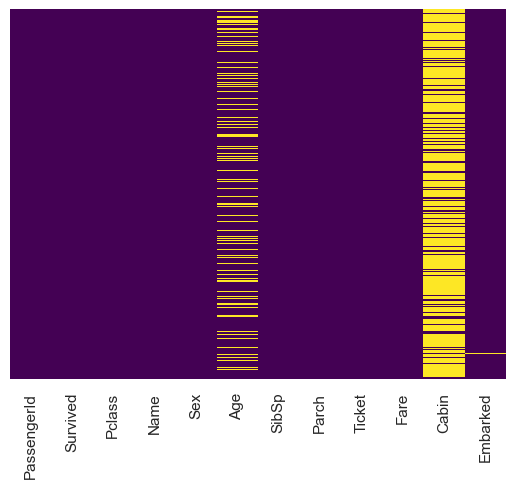

In [6]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [7]:
# How many survived vs not
train_df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [8]:
# Compare survival by sex
train_df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [9]:
# Compare survival by Pclass
train_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

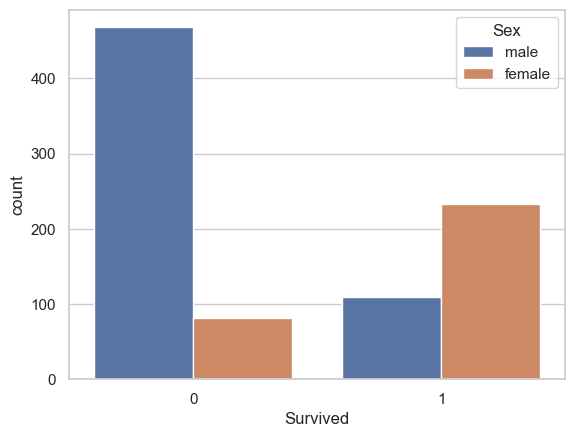

In [10]:
# Survival by gender
sns.countplot(data=train_df, x='Survived', hue='Sex')
plt.show()

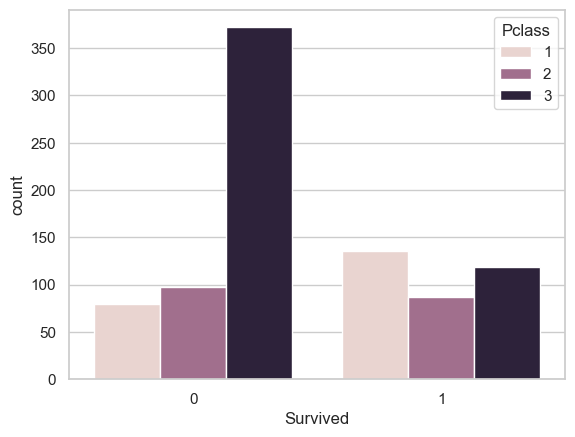

In [11]:
# Survival by class
sns.countplot(data=train_df, x='Survived', hue='Pclass')
plt.show()

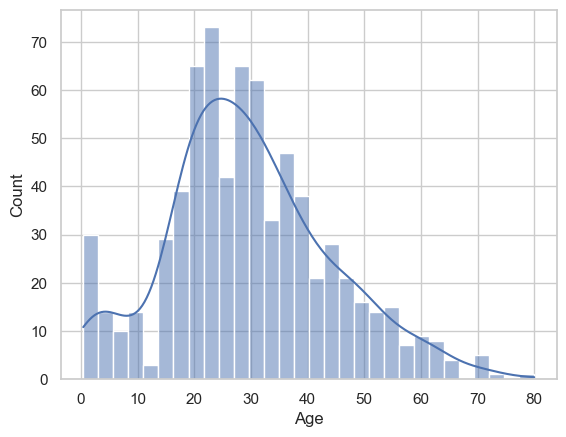

In [12]:
# Age distribution
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.show()

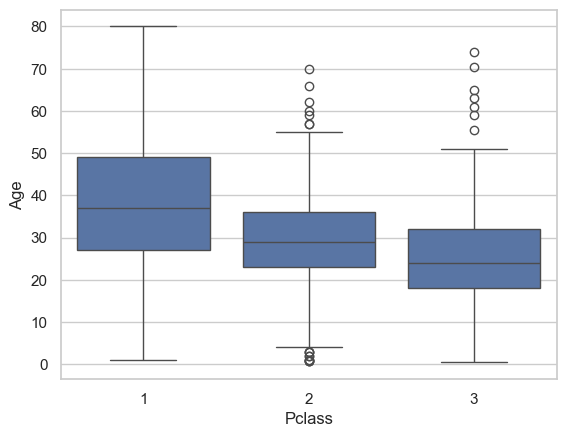

In [13]:
# Box plot of Age by Pclass
sns.boxplot(data=train_df, x='Pclass', y='Age')
plt.show()

In [14]:
#Females had a higher survival rate
#Upper class (Pclass = 1) passengers survived the most and Pclass=3 passengerss died the most.
#There are missing values in Cabin, Age, and Embarked.
#Wealthier passengers in the higher classes tend to be older

In [15]:
train_df.groupby('Age')['Survived'].mean()

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

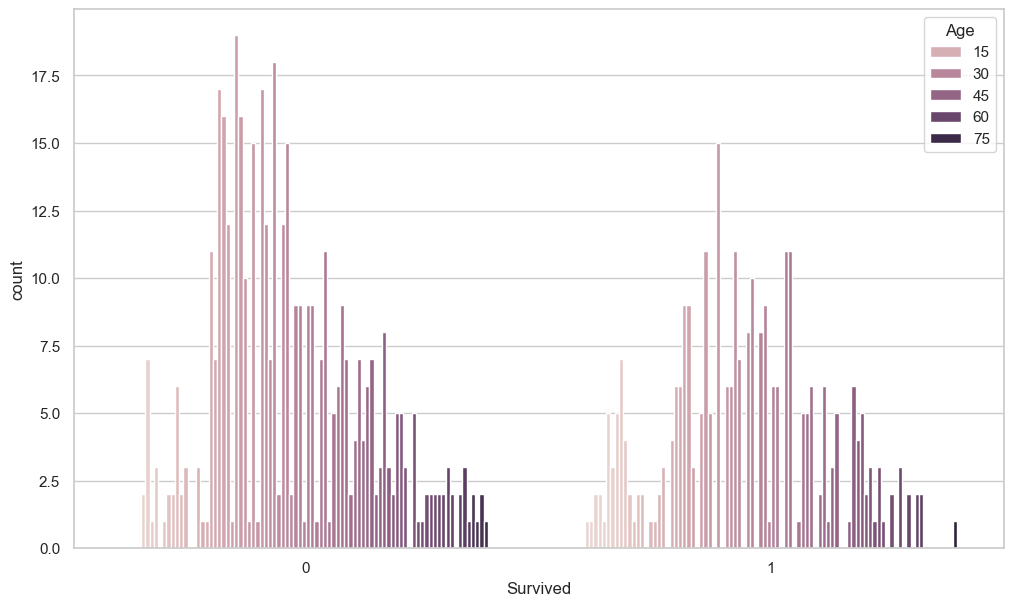

In [16]:
plt.figure(figsize=(12, 7))
sns.countplot(data=train_df, x='Survived', hue='Age')
plt.show()

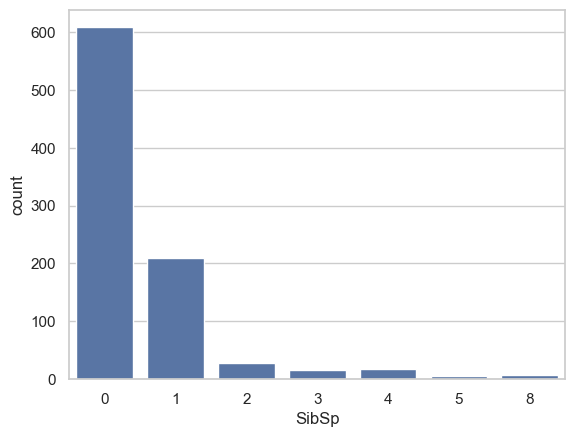

In [17]:
sns.countplot(x='SibSp',data=train_df)
plt.show()

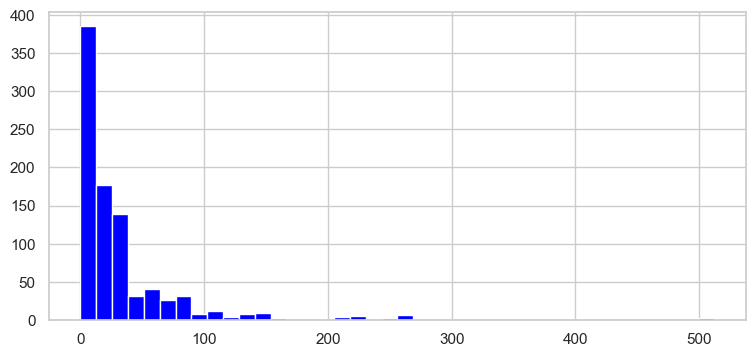

In [18]:
train_df['Fare'].hist(color='blue',bins=40,figsize=(9,4))
plt.show()

In [19]:
def extract_title(name):
    import re
    title_search = re.search(r' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

for df in [train_df, test_df]:
    df['Title'] = df['Name'].apply(extract_title)

# Check unique titles and counts
print(train_df['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [20]:
# Map rare titles to common ones
title_mapping = {
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Rare',
    'Countess': 'Rare',
    'Capt': 'Rare',
    'Col': 'Rare',
    'Don': 'Rare',
    'Dr': 'Rare',
    'Major': 'Rare',
    'Rev': 'Rare',
    'Sir': 'Rare',
    'Jonkheer': 'Rare',
    'Dona': 'Rare'
}

for df in [train_df, test_df]:
    df['Title'] = df['Title'].replace(title_mapping)

# Check the result
print(train_df['Title'].value_counts())

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


In [ ]:
#Combine SibSp (number of siblings/spouses aboard) and Parch (parents/children aboard) plus 1 (the passenger themselves).
#This captures whether a passenger was traveling alone or with family.
#Larger families might have different survival odds.

In [21]:
for df in [train_df, test_df]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [22]:
for df in [train_df, test_df]:
    df['IsAlone'] = 1  # initialize to alone
    df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0  # not alone if family size > 1

In [23]:
#Bin Age and Fare
#pd.cut splits into fixed ranges; pd.qcut splits into quantiles.
for df in [train_df, test_df]:
    df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=[1, 2, 3, 4, 5])
    df['FareBin'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4])

In [24]:
#Drop Unnecessary Columns
#Name: Already used to extract title
#Ticket: Random/unique; not useful
#Cabin: Too many missing values
#PassengerId: Useful for submission, not for training
#Original Age and Fare: I've created binned versions
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age', 'Fare']

for df in [train_df, test_df]:
    df.drop(columns=drop_cols, inplace=True)

In [ ]:
#We need to convert the following categorical columns into numeric format so the model can understand them:
#-Sex; -Embarked ; -Title

# Combine train and test temporarily to ensure consistent dummy columns
combined = pd.concat([train_df, test_df], axis=0, sort=False)

# Encode categorical columns
combined = pd.get_dummies(combined, columns=['Sex', 'Embarked', 'Title', 'AgeBin', 'FareBin'], drop_first=True)

# Split back into train and test sets
train_df = combined.iloc[:len(train_df), :]
test_df = combined.iloc[len(train_df):, :]
#drop_first=True avoids dummy variable trap by dropping one category per column.

In [27]:
train_df.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'FamilySize', 'IsAlone',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare', 'AgeBin_2', 'AgeBin_3', 'AgeBin_4',
       'AgeBin_5', 'FareBin_2', 'FareBin_3', 'FareBin_4'],
      dtype='object')

In [28]:
# Define target
y = train_df['Survived']

# Drop 'Survived' from train_df to get features
X = train_df.drop('Survived', axis=1)

# For test predictions later:
X_test_final = test_df.drop('Survived', axis=1, errors='ignore')  # 'Survived' doesn't exist in test

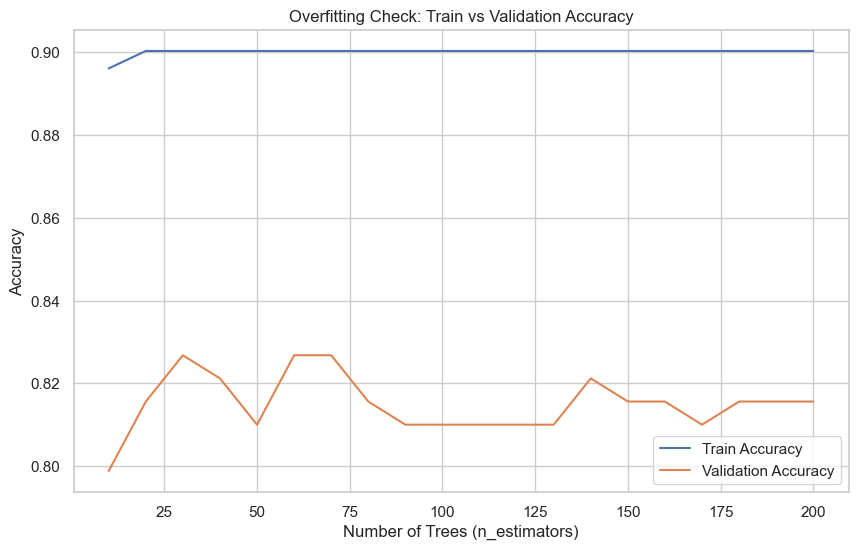

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Track accuracy
train_accuracies = []
val_accuracies = []
estimators = list(range(10, 210, 10))

for n in estimators:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    val_accuracies.append(accuracy_score(y_val, y_val_pred))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(estimators, train_accuracies, label='Train Accuracy')
plt.plot(estimators, val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Overfitting Check: Train vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Let's use 120 trees as an example
final_model = RandomForestClassifier(n_estimators=120, random_state=42)
final_model.fit(X, y)

# Predict on test set
test_preds = final_model.predict(X_test_final)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on validation set
y_val_pred = final_model.predict(X_val)

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_val, y_val_pred)
print("\nClassification Report:\n", cr)

Confusion Matrix:
 [[98  7]
 [13 61]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.93      0.91       105
         1.0       0.90      0.82      0.86        74

    accuracy                           0.89       179
   macro avg       0.89      0.88      0.88       179
weighted avg       0.89      0.89      0.89       179



In [ ]:
#Precision: How many predicted survivors were actually survivors

#Recall: How many actual survivors were correctly predicted

#F1-Score: Balance of precision and recall

#Confusion Matrix: Count of true/false positives and negatives

In [ ]:
#✅ True Negatives (98): The model correctly predicted that 98 people did not survive.

#✅ True Positives (61): The model correctly predicted that 61 people did survive.

#❌ False Positives (7): The model wrongly predicted that 7 people survived — but they didn’t.

#❌ False Negatives (13): The model missed 13 people who actually survived — predicted them as dead

In [ ]:
#My Notes(Manually calculated)
#Accuracy = (TP + TN) / total = (98 + 61) / (98 + 7 + 13 + 61) = 159 / 179 ≈ 88.8%

#Precision (Survived) = TP / (TP + FP) = 61 / (61 + 7) ≈ 89.7%

#Recall (Survived) = TP / (TP + FN) = 61 / (61 + 13) ≈ 82.4%

#F1-Score = Harmonic mean of precision & recall = ~85.9%

In [33]:
# Reload original test CSV to get PassengerId
original_test = pd.read_csv('test.csv')

submission = pd.DataFrame({
    'PassengerId': original_test['PassengerId'],
    'Survived': test_preds
})

submission.to_csv('titanic_feature_engineered_submission.csv', index=False)

In [34]:
# Reload original test file to get correct PassengerId order
original_test = pd.read_csv('test.csv')

# Make predictions again just to be sure
test_preds = final_model.predict(X_test_final)

# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': original_test['PassengerId'],  # Keep original order
    'Survived': test_preds.astype(int)  # Ensure integer type
})

# Save to CSV
submission.to_csv('titanic_feature_engineered_submission.csv', index=False)